# Tutoriel sur la création d'un arbre de décision à partir de zéro

Dans ce tutoriel, nous allons explorer la construction d'un arbre de décision à partir de zéro en utilisant Python. Les arbres de décision sont des modèles de classification puissants qui sont souvent utilisés dans l'apprentissage automatique. Nous allons expliquer les concepts fondamentaux et construire un arbre de décision simple pour classifier des données bidimensionnelles.



## 1. Théorie de base



### 1.1 Introduction aux arbres de décision

Un arbre de décision est une structure en forme d'arbre utilisée pour prendre des décisions en fonction de règles conditionnelles. Chaque nœud de l'arbre représente une question ou un test sur une caractéristique particulière, et chaque branche représente une réponse à cette question. Les feuilles de l'arbre contiennent les prédictions ou les décisions finales.



### 1.2 Algorithme de construction de l'arbre de décision

La construction d'un arbre de décision suit généralement ces étapes :

1. **Sélection de la meilleure caractéristique** : Trouver la caractéristique qui sépare le mieux les données en fonction de certains critères, tels que l'indice de Gini ou l'entropie.

2. **Création d'un nœud de décision** : Créer un nœud de décision basé sur la caractéristique sélectionnée.

3. **Partition des données** : Diviser les données en fonction des réponses possibles à la question du nœud de décision.

4. **Récursion** : Répéter les étapes ci-dessus pour chaque branche de l'arbre jusqu'à ce qu'une condition d'arrêt soit atteinte (par exemple, profondeur maximale de l'arbre ou nombre minimum d'échantillons par feuille).



### 1.3 Critères de division

Deux critères couramment utilisés pour la division des nœuds sont l'indice de Gini et l'entropie. L'indice de Gini mesure l'impureté d'un ensemble de données, tandis que l'entropie mesure le désordre. L'objectif est de réduire l'impureté ou le désordre lors de la construction de l'arbre.



## 2. Implémentation



### 2.1 Importer les bibliothèques nécessaires

Commençons par importer les bibliothèques Python nécessaires.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.2 Générer des données factices
Créez un jeu de données factices pour illustrer le modèle d'arbre de décision. Dans cet exemple, nous allons générer des données bidimensionnelles avec deux classes.

In [4]:
np.random.seed(0)

# Génération de données pour deux classes en deux dimensions
data_class_1 = np.random.normal([2, 2], 1, (100, 2))
data_class_2 = np.random.normal([4, 4], 1, (200, 2))

# Fusion des données
data = np.vstack([data_class_1, data_class_2])
labels = np.array([0] * 100 + [1] * 200)

### 2.3 Visualisation des données
Visualisons la distribution des points de données dans l'espace bidimensionnel.

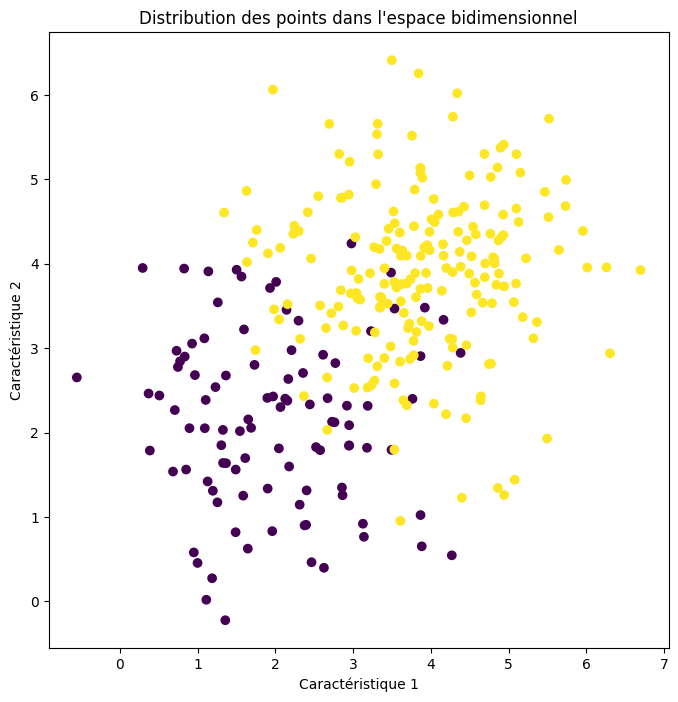

In [5]:
def plot_data(data, labels):
    plt.figure(figsize=(8, 8))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title('Distribution des points dans l\'espace bidimensionnel')
    plt.xlabel('Caractéristique 1')
    plt.ylabel('Caractéristique 2')
    plt.show()

plot_data(data, labels)


La fonction $plot$_$data$ permet de visualiser les données, ce qui est important pour comprendre la répartition des points dans l'espace bidimensionnel.

### 2.4 Construction de l'arbre de décision

La construction de l'arbre de décision est une étape cruciale. Elle consiste à diviser récursivement les données en fonction de critères de division pour construire un arbre de décision. Pour cela, nous allons utiliser plusieurs fonctions qui travaillent ensemble.


#### 2.4.1 Fonction `gini_impurity`

La fonction `gini_impurity` calcule l'impureté de Gini d'un ensemble de données. L'impureté de Gini est une mesure de l'incertitude quant à la classification des données. Plus l'impureté de Gini est faible, plus l'ensemble de données est "pur" en termes de classe.

In [6]:
def gini_impurity(y):
    m = len(y)
    if m == 0:
        return 0
    p0 = (y == 0).sum() / m
    p1 = 1 - p0
    return 1 - (p0 ** 2 + p1 ** 2)

Cette fonction est utilisée pour évaluer la pureté des données à chaque étape de la division de l'arbre.

#### 2.4.2 Fonction `split_data`
La fonction `split_data` prend en entrée les données, les étiquettes, l'indice de la caractéristique et le seuil de division. Elle divise les données en deux en fonction de la caractéristique sélectionnée et du seuil.

In [7]:
def split_data(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] < threshold
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    return X_left, y_left, X_right, y_right

Cette fonction est utilisée pour séparer les données en deux groupes, à gauche et à droite, en fonction du nœud de décision.


#### 2.4.3 Fonction `find_best_split`
La fonction `find_best_split` recherche la meilleure caractéristique et le meilleur seuil de division pour minimiser l'impureté de Gini.

In [8]:
def find_best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None, None

    num_parent = [np.sum(y == c) for c in np.unique(y)]
    best_gini = 1 - sum((n / m) ** 2 for n in num_parent)
    best_feature_index, best_threshold = None, None

    for feature_index in range(n):
        thresholds, classes = zip(*sorted(zip(X[:, feature_index], y)))
        num_left = [0] * len(np.unique(y))
        num_right = num_parent.copy()

        for i in range(1, m):
            c = classes[i - 1]
            num_left[c] += 1
            num_right[c] -= 1

            gini_left = 1 - sum((num_left[x] / i) ** 2 for x in np.unique(y))
            gini_right = 1 - sum((num_right[x] / (m - i)) ** 2 for x in np.unique(y))
            gini = (i * gini_left + (m - i) * gini_right) / m

            if thresholds[i] == thresholds[i - 1]:
                continue

            if gini < best_gini:
                best_gini = gini
                best_feature_index = feature_index
                best_threshold = (thresholds[i] + thresholds[i - 1]) / 2

    return best_feature_index, best_threshold

La fonction `find_best_split` parcourt toutes les caractéristiques et les seuils possibles pour trouver la meilleure division.

#### 2.4.4 Fonction `build_decision_tree`
La fonction `build_decision_tree` est la fonction principale de construction de l'arbre de décision. Elle prend en entrée les données, les étiquettes, la profondeur actuelle et la profondeur maximale de l'arbre.

In [12]:
def build_decision_tree(X, y, depth=0, max_depth=None):
    num_samples_per_class = [np.sum(y == i) for i in np.unique(y)]
    predicted_class = np.argmax(num_samples_per_class)
    node = {
        'gini': gini_impurity(y),
        'num_samples': len(y),
        'num_samples_per_class': num_samples_per_class,
        'predicted_class': predicted_class,
        'feature_index': 0,
        'threshold': 0,
    }

    if depth < max_depth:
        feature_index, threshold = find_best_split(X, y)
        if feature_index is not None:
            X_left, y_left, X_right, y_right = split_data(X, y, feature_index, threshold)
            if len(X_left) > 0 and len(X_right) > 0:
                node['feature_index'] = feature_index
                node['threshold'] = threshold
                node['left'] = build_decision_tree(X_left, y_left, depth + 1, max_depth)
                node['right'] = build_decision_tree(X_right, y_right, depth + 1, max_depth)

    return node

La fonction `build_decision_tree` crée récursivement un nœud de décision, en choisissant la meilleure caractéristique et le seuil de division, puis en divisant les données en deux sous-ensembles. Cette opération est répétée jusqu'à ce que la profondeur maximale soit atteinte ou qu'il ne soit plus possible de diviser les données.

### 2.5 Visualisation de l'arbre de décision
Nous allons maintenant visualiser l'arbre de décision que nous venons de construire.

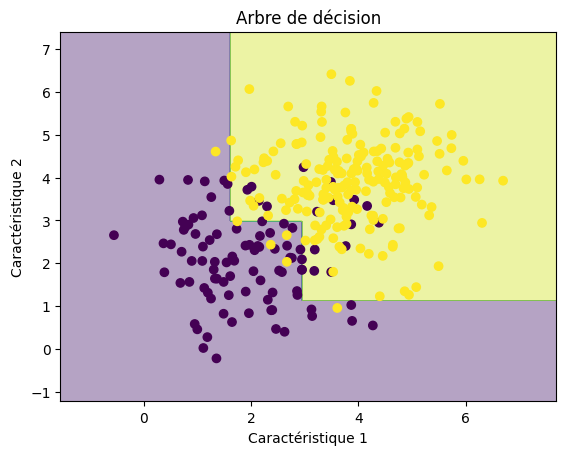

In [14]:
def plot_decision_tree(tree, X, y):
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = np.array([predict_tree(tree, np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Caractéristique 1')
    plt.ylabel('Caractéristique 2')
    plt.title('Arbre de décision')
    plt.show()

def predict_tree(tree, x):
    if 'left' not in tree and 'right' not in tree:
        return tree['predicted_class']
    if x[tree['feature_index']] < tree['threshold']:
        return predict_tree(tree['left'], x)
    else:
        return predict_tree(tree['right'], x)

tree = build_decision_tree(data, labels, max_depth=3)
# Visualisation de l'arbre de décision
plot_decision_tree(tree, data, labels)

La fonction `plot_decision_tree` permet de visualiser l'arbre de décision et comment il divise l'espace en fonction des caractéristiques sélectionnées et des seuils de division. La fonction predict_tree permet de faire des prédictions en suivant l'arbre de décision.

## 3. Conclusion
Les arbres de décision sont des outils puissants pour la classification et la régression. Ce tutoriel a expliqué les concepts fondamentaux derrière les arbres de décision, y compris les critères de division, et a montré comment construire un arbre de décision à partir de zéro en utilisant Python. N'hésitez pas à expérimenter avec d'autres ensembles de données ou à ajuster les paramètres de l'arbre pour mieux comprendre son fonctionnement dans différents contextes.